In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical
from keras import models
from keras import layers

In [8]:
df = pd.read_csv('/home/miftah/Downloads/Compressed/IMDB Dataset.csv')

In [17]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Check for null values

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
# No null values are present. Hence we are good to go.
# Check the distribution of positive and negative reviews

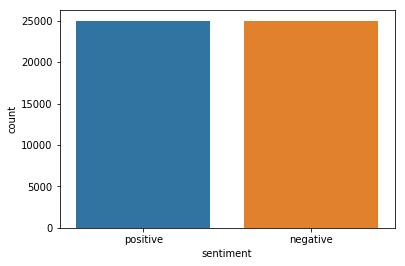

In [13]:
sns.countplot(x=df['sentiment'])

In [15]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [16]:
# We have equal number of positive and negative reviews

In [18]:
# Wordcloud
from wordcloud import WordCloud

In [19]:
# Wordcloud for positive sentiments

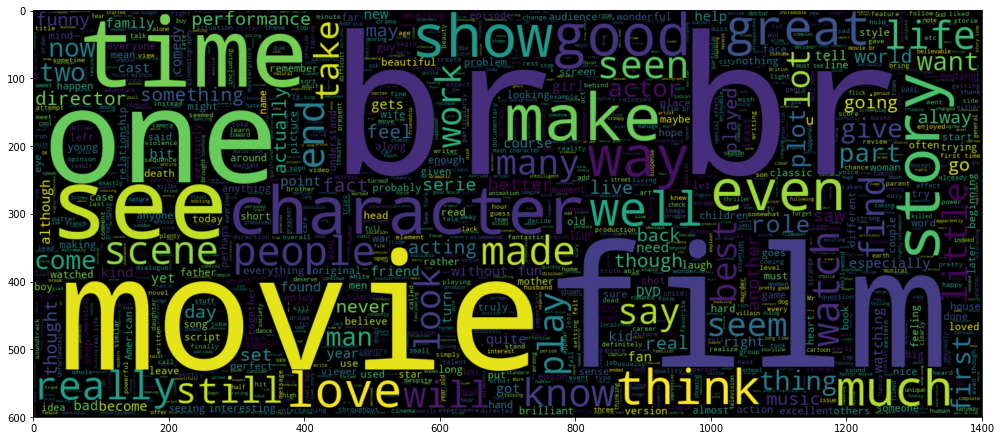

In [21]:
plt.figure(figsize=(17,17))
wc = WordCloud(max_words = 1800 , width = 1400 , height = 600).generate(" ".join(df[df.sentiment == 'positive'].review))                                                                       
plt.imshow(wc, interpolation='bilinear')

In [22]:
# Wordcloud for negative sentiments

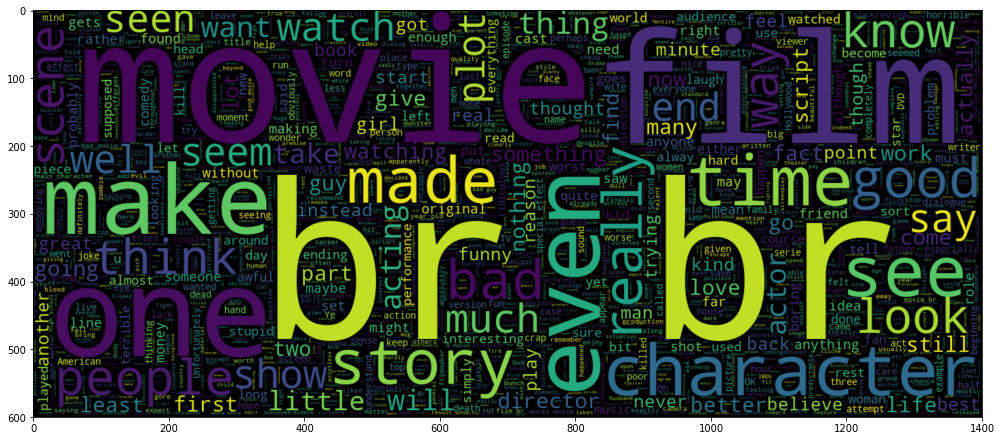

In [23]:
plt.figure(figsize=(17,17))
wc = WordCloud(max_words =1800 , width = 1400 , height = 600).generate(" ".join(df[df.sentiment == 'negative'].review))                                                                       
plt.imshow(wc, interpolation='bilinear')



In [33]:
# Sentiment Mapping, Computers understand only binary, so we convert 'positive' and 'negative' sentiments into binary form. positive: 0 negative: 1


In [34]:
label_sentiment = {'positive': 0, 'negative': 1}

y = df.sentiment.map(label_sentiment)


In [68]:
df.head()

AttributeError: 'DataFrame' object has no attribute 'y'

In [31]:
'''
Data cleaning
Remove characters other than alphabets
Lemmatize the words so that all the words get reduced to their root words
Change the words to lowercase so that 'Girl' and 'girl' are not considered as two unique words.
We define 3 functions for carrying out three different tasks:
1. Remove HTML tags from the reviews
2. Remove special characters other than alphabets from the review
3. Remove stopwords from the review

'''

"\nData cleaning\nRemove characters other than alphabets\nLemmatize the words so that all the words get reduced to their root words\nChange the words to lowercase so that 'Girl' and 'girl' are not considered as two unique words.\nWe define 3 functions for carrying out three different tasks:\n1. Remove HTML tags from the reviews\n2. Remove special characters other than alphabets from the review\n3. Remove stopwords from the review\n\n"

In [32]:
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [35]:
def clean_html(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text
    
def clean_spcl_chars(text):
    clean_text = re.sub('[^a-zA-Z]', ' ', text) 
    return clean_text

def remove_stopwords(text):
    clean_text = []
    text = text.split()
    for word in text:
        if word not in stopwords.words('english'):
            clean_text.append(word)
    return ' '.join(clean_text)
    


In [36]:
# Remove the HTML tags

In [37]:
df["clean_review"] = df.review.apply(clean_html)

In [38]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The realism rea...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


In [39]:
# Remove special characters

In [40]:
df.clean_review = df.clean_review.apply(clean_spcl_chars)
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The realism rea...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is...


In [41]:
# Remove stopwords


In [43]:
df.clean_review = df.clean_review.apply(remove_stopwords)
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching Oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The realism real...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically family little boy Jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei Love Time Money visually stunnin...


In [45]:
# Lemmatize the words
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

In [46]:
df['lemmatized_review'] = df['clean_review'].apply(lemmatize_text)
df.head()

,review,sentiment,clean_review,lemmatized_review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching Oz episode ho...,One reviewer mentioned watching Oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The realism real...,A wonderful little production The realism real...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically family little boy Jake thinks zombie...,Basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei Love Time Money visually stunnin...,Petter Mattei Love Time Money visually stunnin...


In [48]:
#  Save the cleaned review dataframe as pickle object, so that I don't have to run the cleaning process everytime I open this notebook

In [49]:
df.to_pickle('cleaned_df.pkl')

In [50]:
# Vectorize review.So We will use Term frequency - inverse document frequency (Tf-idf) as for vectorizing the reviews


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [52]:
X = df['lemmatized_review']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [57]:
# Training Pipeline.So We will create a pipeline for diffrent classifiers


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

In [59]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB() )])
pipe2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC() )])
pipe3 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier() )])

In [61]:
pipes = [pipe1, pipe2, pipe3]
log = []
for i,pipe in enumerate(pipes):
    name = f'pipe_{i}'
    pipe.fit(X_train, y = y_train)
    y_pred = pipe.predict(X_test)
    print('**RESULTS**')
    acc = accuracy_score(y_test, y_pred).round(2)
    log.append((name, acc))
    print(classification_report(y_test, y_pred))
    print(pipe.score(X_test, y_test))

**RESULTS**
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5039
           1       0.84      0.85      0.84      4961

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

0.8444
**RESULTS**
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5039
           1       0.87      0.84      0.85      4961

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

0.8578
**RESULTS**
              precision    recall  f1-score   support

           0       0.73      0.82      0.78      5039
           1       0.80      0.69      0.74      4961

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76 

In [62]:
clf_list = ['MultinomialNB', 'LinearSVC', 'RandomForset']

In [63]:
accuracy = [log[i][1].round(2) for i in range(len(log))]

In [64]:
accuracy

[0.84, 0.86, 0.76]

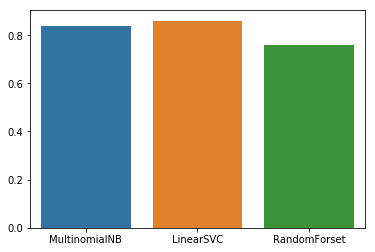

In [65]:
sns.barplot(x=clf_list, y = accuracy)

In [66]:
# from the above graph we can see that, LinearSVC has the highest accuracy of 86%
